In [1]:
from google.colab import files

files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


{'test.csv': b'time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco,el_price\n2022-08-25 00:00:00+03:00,21.1,15.2,69.0,0.0,,340.0,9.0,9.3,1022.0,2.0,0.25533\n2022-08-25 01:00:00+03:00,20.1,15.1,73.0,0.0,,30.0,6.0,14.8,1022.0,2.0,0.19491999999999998\n2022-08-25 02:00:00+03:00,20.1,15.1,73.0,0.0,,320.0,7.0,13.0,1022.0,2.0,0.18853\n2022-08-25 03:00:00+03:00,18.7,17.0,90.0,0.0,,0.0,4.0,11.1,1022.4,4.0,0.19947\n2022-08-25 04:00:00+03:00,18.1,17.1,94.0,0.0,,280.0,7.0,11.1,1022.0,3.0,0.21192\n2022-08-25 05:00:00+03:00,18.1,17.1,94.0,0.0,,120.0,7.0,9.3,1022.0,3.0,0.26375\n2022-08-25 06:00:00+03:00,18.1,17.1,94.0,0.0,,330.0,11.0,9.3,1022.0,3.0,0.28595\n2022-08-25 07:00:00+03:00,18.1,17.1,94.0,0.0,,340.0,13.0,9.3,1022.0,18.0,0.48999000000000004\n2022-08-25 08:00:00+03:00,19.1,17.1,88.0,0.0,,330.0,9.0,9.3,1022.0,18.0,0.66203\n2022-08-25 09:00:00+03:00,19.0,18.2,95.0,0.0,,20.0,4.0,9.3,1022.5,4.0,0.69048\n2022-08-25 10:00:00+03:00,20.1,17.1,83.0,0.0,,20.0,7.0,9.3,1022.0,3.0,0.64023\n2022-08-25 11

In [9]:
import pandas as pd
from datetime import datetime as dt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

In [36]:
df = pd.read_csv('train.csv')
df = df[['temp', 'coco', 'el_price', 'consumption', 'time']]

print(df['temp'].isnull().sum())
print(df['coco'].isnull().sum())
print(df['el_price'].isnull().sum())
print(df['consumption'].isnull().sum())
df['coco'] = df['coco'].interpolate(method='linear', limit_direction='forward')
df['consumption'] = df['consumption'].interpolate(method='linear', limit_direction='forward')

0
196
0
2


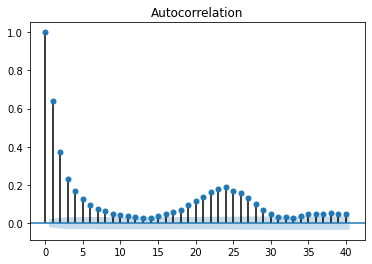

In [4]:
plot_acf(df['consumption'])
pyplot.show()

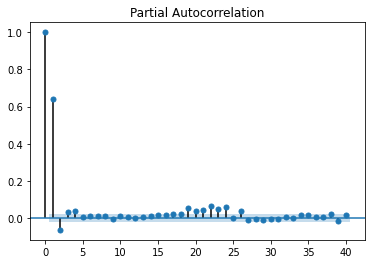

In [5]:
plot_pacf(df['consumption'])
pyplot.show()

In [37]:
consumption = df['consumption']
exog = df[['temp', 'coco', 'el_price']]

N = consumption.shape[0]

train_consumption = consumption[0:N-7*24]
test_consumption = consumption[N-7*24:N]

train_exog = exog[0:N-7*24]
test_exog = exog[N-7*24:N]

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


0.41061996387988975


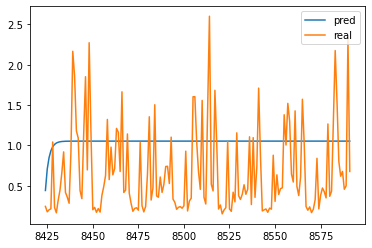

In [38]:
arima = ARIMA(train_consumption, (2, 0, 1), exog = None).fit()
pred = arima.predict(start = N-7*24, end = N-1, exog = None)

mse = ((test_consumption - pred) ** 2).mean()
print(mse)

results = pd.DataFrame({'pred': pred, 'real': test_consumption})
results.plot()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


0.5179859034999508


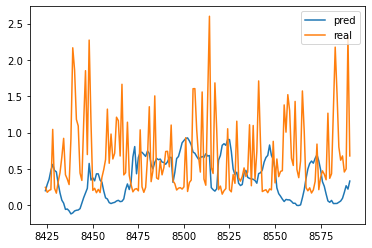

In [39]:
arima = ARIMA(train_consumption, (2, 0, 1), exog = train_exog).fit()
pred = arima.predict(start = N-7*24, end = N-1, exog = test_exog)

mse = ((test_consumption - pred) ** 2).mean()
print(mse)

results = pd.DataFrame({'pred': pred, 'real': test_consumption})
results.plot()

In [40]:
train_consumption_mean = train_consumption.mean()
train_consumption_std = train_consumption.std()
train_consumption = (train_consumption - train_consumption_std) / train_consumption_std

train_exog_mean = train_exog.mean()
train_exog_std = train_exog.std()
train_exog = (train_exog - train_exog_mean) / train_exog_std

test_exog = (test_exog - train_exog_mean) / train_exog_std

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


0.5480217100738382


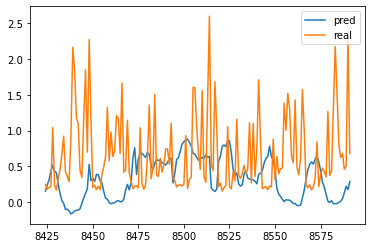

In [41]:
arima = ARIMA(train_consumption, (2, 0, 1), exog = train_exog).fit()
pred = arima.predict(start = N-7*24, end = N-1, exog = test_exog)
pred = pred * train_consumption_std + train_consumption_mean

mse = ((test_consumption - pred) ** 2).mean()
print(mse)

results = pd.DataFrame({'pred': pred, 'real': test_consumption})
results.plot()